<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Ali Aramideh

**Student ID**: 98101736

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [64]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

# Read the datas from 'q2-train.npy' file:
data = np.load('q2-train.npy')
m, n = data.shape
X_train = data[:, 0].reshape(m, 1)
Y_train = data[:, 1].reshape(m, 1)

# Read the datas from 'q2-valid.npy' file:
data = np.load('q2-valid.npy')
m, n = data.shape
X_val = data[:, 0].reshape(m, 1)
Y_val = data[:, 1].reshape(m, 1)

# Read the datas from 'q2-test.npy' file:
data = np.load('q2-test.npy')
m, n = data.shape
X_test = data[:, 0].reshape(m, 1)
Y_test = data[:, 1].reshape(m, 1)

### END CODE HERE ###

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [47]:
def create_matrix(X, k):
  '''
  X: an m by 1 array 
  '''
  new_X = None
  ### START CODE HERE ###

  # Initialize new_X for using append method:
  new_X = []

  # Create new_X matrix:
  for i in range(k+1):
    new_X.append(X**k)


  ### END CODE HERE ###
  return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [ ]:
# If you need any other function for training write it here
# (like gradient descent or anything else)

In [65]:
def train(X_train, Y_train, X_val, Y_val, k):
  '''
  X_train: an m_train by 1 vector contains training points
  Y_train: an m_train by 1 vector contains training values
  X_val: an m_val by 1 vector contains validation points
  Y_val: an m_val by 1 vector contains validation values
  k: degree of polynomial
  '''
  w, loss_train, loss_val = None, None, None
  ### START CODE HERE ###

  alpha = 0.01
  num_iters = 1000
  
  w = np.zeros(m).reshape(1, m)

  for i in range(num_iters):
    Y_pred_train = np.dot(X_train, w)
    error_train = Y_pred_train - Y_train

    w -= alpha * (np.dot(X_train.T, error_train) + k*w)

    loss_train = np.mean(error_train **2) + k*np.sum(w **2)

    Y_pred_val = np.dot(X_val, w)
    error_val = Y_pred_val - Y_val
    loss_val = np.mean(error_val **2) +k*np.sum(w **2)

  

  ### END CODE HERE ###
  return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**:When k is small, the model will be more sensitive to noise and outliers in the data. This is because the prediction for a new data point is based on only a few nearby neighbors, which may not be representative of the overall pattern in the data. As a result, the model may overfit to the training set and perform poorly on new, unseen data.

On the other hand, when k is large, the model will be less sensitive to noise and outliers in the data. This is because the prediction for a new data point is based on more neighbors, which are likely to be more representative of the overall pattern in the data. However, if k is too large, then important patterns and trends in the data may be overlooked, leading to underfitting.

Therefore, it is important to choose an appropriate value for k that balances between overfitting and underfitting. This can be done by using cross-validation techniques to evaluate different values of k and selecting one that provides good performance on both training and validation sets.

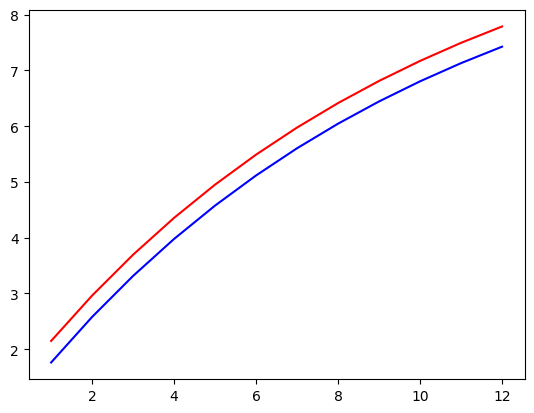

In [88]:
### START CODE HERE ###

k_set = [x for x in range(1, 13)]
loss_train_set = []
loss_val_set = []

for k in k_set:
    w, loss_train, loss_val = train(X_train, Y_train, X_val, Y_val, k)
    loss_train_set.append(loss_train)
    loss_val_set.append(loss_val)

plt.plot(k_set, loss_train_set, color = 'blue')
plt.plot(k_set, loss_val_set, color = 'red')
plt.show()
## In this graph, blue plot show the loss on the training and red show the loss on the validation ##

### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**: We need a test set for evaluating a model that has been trained to ensure that it can generalize well to new, unseen data. Without a test set, we would have no way of knowing how well the model performs on data it has not seen before.


The purpose of training a model is to learn patterns and relationships in the data that can be used to make predictions on new data. However, if the model is overfitting to the training data, it may perform poorly on new data because it has learned specific details about the training set that do not apply to other datasets.


By using a separate test set, we can evaluate how well the model generalizes to new data and make adjustments as needed. This helps us ensure that our model is robust and reliable for real-world applications.

In [91]:
### START CODE HERE ###

### END CODE HERE ###